## imdb_data_analysis.py

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = 'imdb-movies.csv'
df = pd.read_csv(data_path)

print("Dataset Overview:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  r

### Step 4: Cleaning the data

In [3]:

# Handling missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


df = df.dropna(subset=['original_title', 'vote_average', 'genres'])


df['budget'] = df['budget'].fillna(df['budget'].mean())
df['revenue'] = df['revenue'].fillna(df['revenue'].mean())


Missing values in each column:
id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


## Step 5: Data Analysis and Visualization
### 1. Top 10 rated movies

In [4]:
top_rated_movies = df[['original_title', 'vote_average']].sort_values(by='vote_average', ascending=False).head(10)
print("\nTop 10 Rated Movies:")
print(top_rated_movies)


Top 10 Rated Movies:
                                         original_title  vote_average
3894                      The Story of Film: An Odyssey           9.2
538                                The Mask You Live In           8.9
1200                      Black Mirror: White Christmas           8.8
2269                                        Life Cycles           8.8
6911                                  Pink Floyd: Pulse           8.7
2401    Opeth: In Live Concert At The Royal Albert Hall           8.6
3690                                  The Art of Flight           8.5
3224  John Mayer: Where the Light Is Live in Los Ang...           8.5
8221  A Personal Journey with Martin Scorsese Throug...           8.5
8411                              Queen - Rock Montreal           8.5


### 2. Distribution of movie ratings

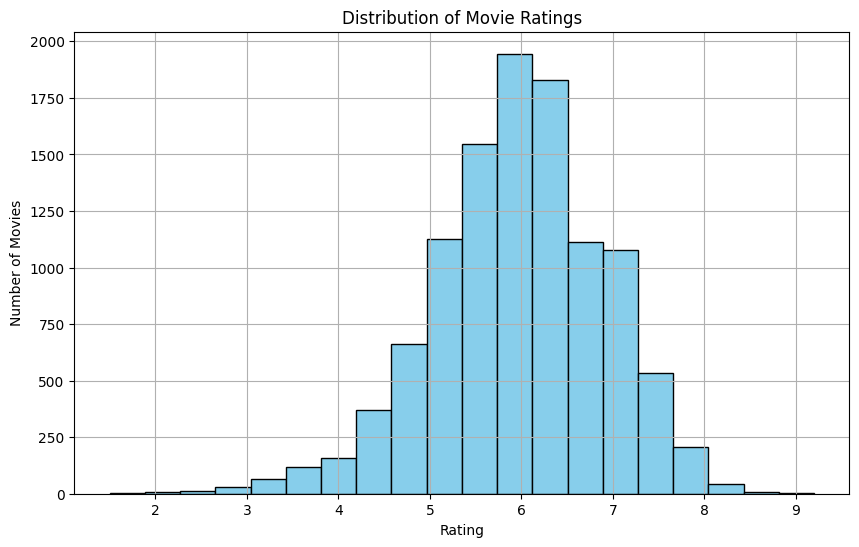

In [10]:
plt.figure(figsize=(10,6))
plt.hist(df['vote_average'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

### 3. Average rating per genre


Average Rating by Genre:
genres
Documentary        6.908462
Music              6.480392
History            6.410479
Animation          6.403147
War                6.297778
Drama              6.165301
Crime              6.124059
Western            6.083030
Romance            6.042874
Family             5.997563
Foreign            5.981383
Mystery            5.946790
Adventure          5.940585
Comedy             5.905167
Fantasy            5.863537
TV Movie           5.788024
Action             5.787421
Thriller           5.750413
Science Fiction    5.665041
Horror             5.337447
Name: vote_average, dtype: float64


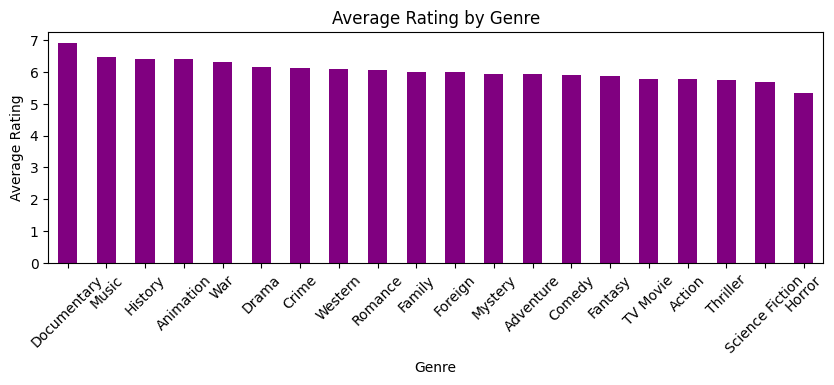

In [36]:

# Splitting genres (some movies may have multiple genres)
df['genres'] = df['genres'].str.split('|')
df = df.explode('genres')

average_rating_genre = df.groupby('genres')['vote_average'].mean().sort_values(ascending=False)
print("\nAverage Rating by Genre:")
print(average_rating_genre)


plt.figure(figsize=(10,3))
average_rating_genre.plot(kind='bar', color='purple')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

### 4. Relationship between budget and revenue

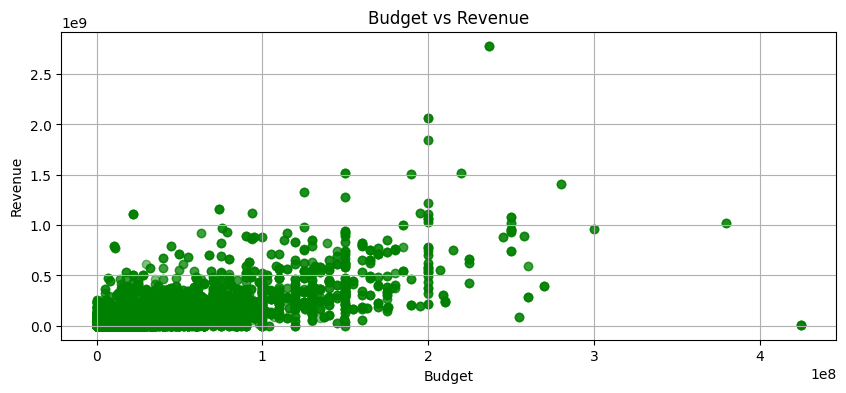

In [37]:

plt.figure(figsize=(10,4))
plt.scatter(df['budget'], df['revenue'], color='green', alpha=0.5)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

### Step 6: Saving the cleaned and analyzed data

In [25]:

cleaned_data_path = 'imdb-movies-cleaned.csv'
df.to_csv(cleaned_data_path, index=False)


### Pie chart for Genre distribution

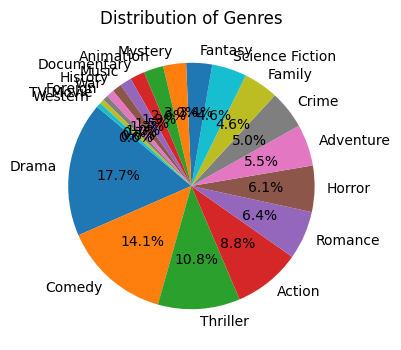

In [38]:

genre_counts = df['genres'].value_counts()

plt.figure(figsize=(8,4))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Genres')
plt.show()


### Subplot with a bar chart (for genres) and a histogram (for vote_average)

/var/folders/hj/lz0bq8mn5mvcrwft0knrgr8r0000gn/T/ipykernel_1417/2602282702.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(genre_counts.index, rotation=45, ha="right")


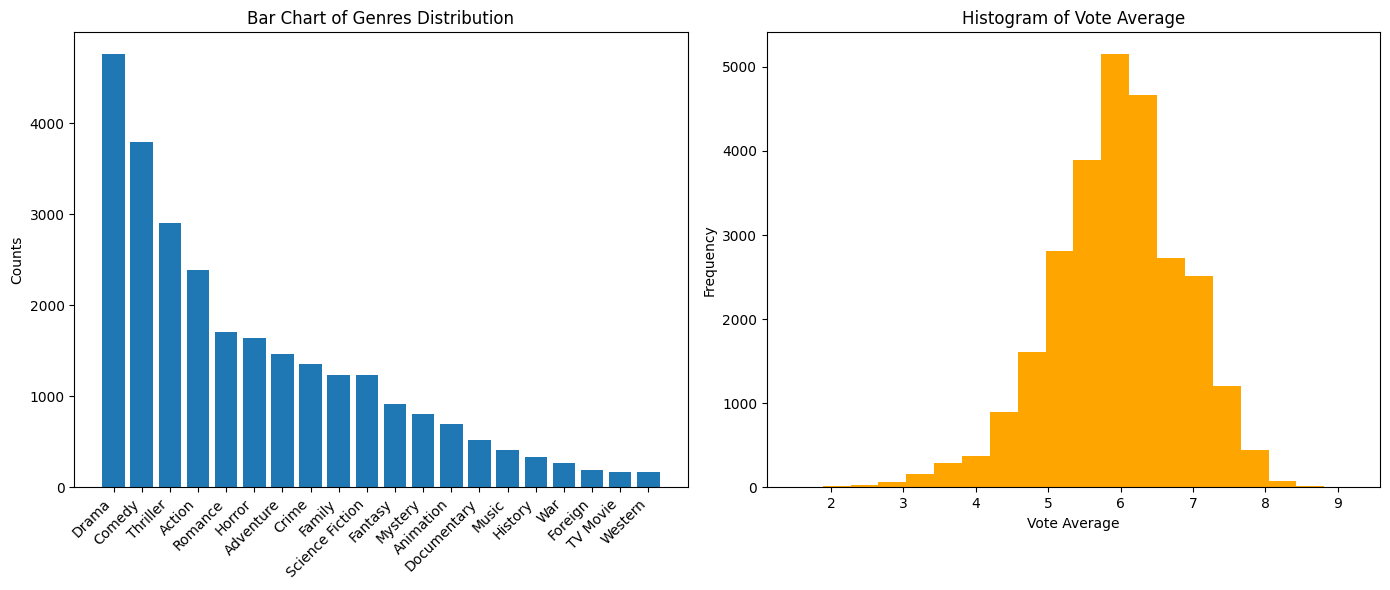

In [28]:

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for genres distribution
axs[0].bar(genre_counts.index, genre_counts.values)
axs[0].set_title('Bar Chart of Genres Distribution')
axs[0].set_ylabel('Counts')
axs[0].set_xticklabels(genre_counts.index, rotation=45, ha="right")

# Histogram for vote_average
axs[1].hist(df['vote_average'], bins=20, color='orange')
axs[1].set_title('Histogram of Vote Average')
axs[1].set_xlabel('Vote Average')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
